In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dir = "//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/"
f = dir + 'res2dinv_outputs/fixed_regions/eastern/eastern_transect_with_fixed_regions_n1_s1_xyz.txt'
xyz = pd.read_csv(f, skiprows=47, sep='\s+')

In [14]:
eastshore = gpd.read_file(dir+'processing/shoreline/eastern_intersections.shp')

In [18]:
import pickle
# Create Point geometries from eastshore coordinates
eastshore['geometry'] = [Point(x, y) for x, y in zip(eastshore['x'], eastshore['y'])]

# Create Polygon geometries from xyz coordinates
xyz['geometry'] = [Polygon([(x1, y1), (x3, y1), (x3, y3), (x1, y3)]) for x1, x3, y1, y3 in zip(xyz['x1g'], xyz['x3g'], xyz['y1g'], xyz['y3g'])]
#xyz['geometryxyz'] = [Polygon([(x1, y1), (x3, y1), (x3, y3), (x1, y3)]) for x1, x3, y1, y3 in zip(xyz['x1'], xyz['x3'], xyz['z1'], xyz['z3'])]
# Convert DataFrames to GeoDataFrames
eastshore_gdf = gpd.GeoDataFrame(eastshore, geometry='geometry')
xyz_gdf = gpd.GeoDataFrame(xyz, geometry='geometry')
##xyz_gdf_pg = gpd.GeoDataFrame(xyz, geometry='geometryxyz')
# Perform spatial join
joined = gpd.sjoin(eastshore_gdf, xyz_gdf, how='inner', op='within')
joined['year_difference'] = 2023 - joined['year']
with open(dir+'processing/shoreline/joined_east.pkl', 'wb') as f:
    pickle.dump(joined, f)
#joined_pg = gpd.sjoin(eastshore_gdf, xyz_gdf_pg, how='inner', op='within')
# 'joined' now contains the points from eastshore along with the attributes of the corresponding blocks from xyz


c:\Users\mealiy001\AppData\Local\anaconda3\envs\pg\Lib\site-packages\IPython\core\interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_35388\3259309492.py:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:32608
Right CRS: None

  joined = gpd.sjoin(eastshore_gdf, xyz_gdf, how='inner', op='within')


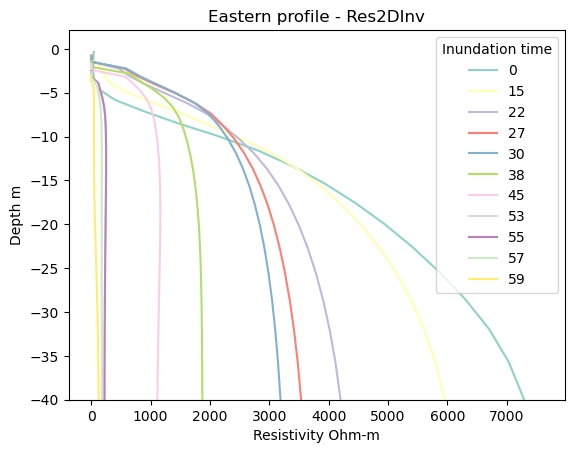

In [20]:

# Get unique years and sort them
unique_years = sorted(joined['year_difference'].unique())

# Define a color map with a different color for each year
colors = plt.cm.Set3(np.linspace(0, 1, len(unique_years)))

# Plot res against zc for each value of year
for year, color in zip(unique_years, colors):
    year_data = joined[joined['year_difference'] == year]
    plt.plot(year_data['res'], year_data['zc'], label=year, color=color)

# Add labels and legend
plt.ylabel('Depth m')
plt.ylim(-40)
plt.xlabel('Resistivity Ohm-m')
plt.legend(title='Inundation time', loc='best')  # Adjust legend location as needed
plt.title('Eastern profile - Res2DInv')
plt.show()
